**Kwadratury adaptacyjne**

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec

**Zadanie 1.**

In [63]:
# Data
f = lambda x: 4/(1+x*x)
a = 0.0
b = 1.0
true_value = np.pi
t_range = np.array(range(0, -15, -1))
tolerances = 10.0**t_range
errors_trap = []
errors_gk = []
eval_count_trap = []
eval_count_gk = []

In [64]:
# Adaptive trapezoid quadrature
for t in tolerances:
    value, _, info = quad_vec(f, a, b, epsabs=t, full_output=True, quadrature='trapezoid')
    error = np.abs((value-true_value)/true_value)
    errors_trap.append(error)
    eval_count_trap.append(info.neval)

# Adaptive Gauss-Kronrod quadrature
for t in tolerances:
    value, _, info = quad_vec(f, a, b, epsabs=t, full_output=True, quadrature='gk21')
    error = np.abs((value-true_value)/true_value)
    errors_gk.append(error)
    eval_count_gk.append(info.neval)

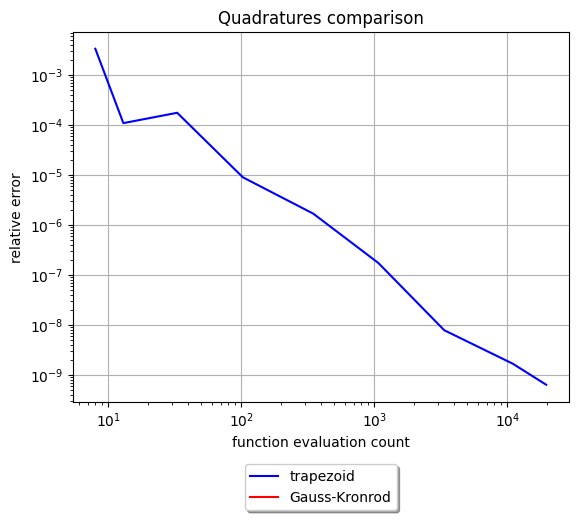

In [73]:
# Plot
plt.title("Adaptive quadratures comparison")
plt.plot(eval_count_trap, errors_trap, color='blue', label='trapezoid')
plt.plot(eval_count_gk, errors_gk, color='red', label='Gauss-Kronrod')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('function evaluation count')
plt.ylabel('relative error')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()